<a href="https://colab.research.google.com/github/BrahianCarrera/CompeticionKaggle/blob/main/01%20-%20exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

725

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp
import numpy as np

def func(x):
    return x**3 - x - 2

In [ ]:
def bisection(xl, xu, error):
    if func(xl) * func(xu) > 0:
        print("No hay raíces en el intervalo dado")
        return None, 0, []

    data = []
    iterations = 0
    xr_old = xl

    while True:
        xr = (xl + xu) / 2  # Punto medio
        fxr = func(xr)

        if fxr == 0 or abs(xr - xr_old) < error:  # Encontramos la raíz o el cambio es menor que el error
            return xr, iterations, data

        # Actualizamos los límites
        if fxr * func(xl) < 0:
            xu = xr  # La raíz está en [xl, xr]
        else:
            xl = xr  # La raíz está en [xr, xu]

        iterations += 1
        data.append((iterations, xl, xu, xr, abs(xr - xr_old)))
        xr_old = xr

    return xr, iterations, data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[15.0, 7.5, 3.75, 1.875, 0.9375, 0.46875, 0.234375, 0.1171875, 0.05859375, 0.029296875, 0.0146484375, 0.00732421875, 0.003662109375, 0.0018310546875]


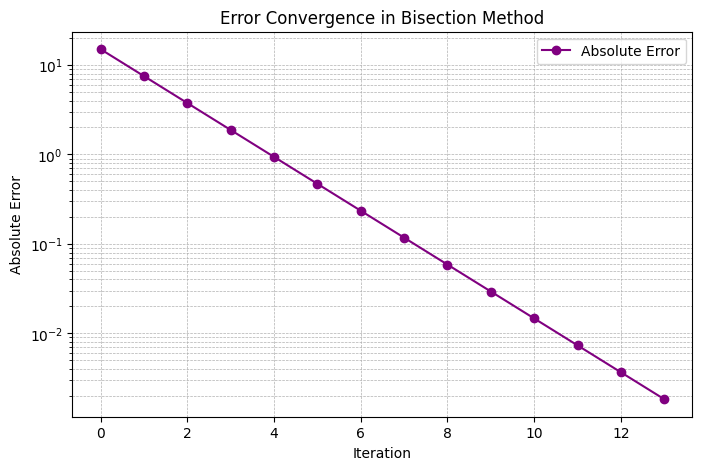

In [ ]:
data = bisection( -10 , 20, 0.001)
iterations = arr = list(range(data[1]))
errors = [fila[4] for fila in data[-1]]

#
plt.figure(figsize=(8, 5))
plt.semilogy(iterations, errors, marker="o", linestyle="-", color="purple", label="Absolute Error")

# Personalización de la gráfica
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Error Convergence in Bisection Method")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar gráfica
plt.show()

In [ ]:
def make_pretty(styler):
 styler.set_caption("Raices por metodo de biseccion")
 styler.background_gradient(axis=0, vmin=0, vmax=max(errors), cmap="RdYlGn_r", subset = ['error'])

 styler.set_table_styles(
    [
        {"selector": "table", "props": [ ("box-shadow", "5px 5px 15px rgba(0,0,0,0.3)")]},
        {"selector": "th, td", "props": [("padding", "10px"), ("border", "1px solid #ddd")]}
    ]
)
 return styler

In [ ]:
pd.DataFrame(data[-1], columns=[ "iterations","xl", "xu", "xr", "error"]).style.pipe(make_pretty)




,iterations,xl,xu,xr,error
0,1,-10.000000,5.000000,5.000000,15.000000
1,2,-2.500000,5.000000,-2.500000,7.500000
2,3,1.250000,5.000000,1.250000,3.750000
3,4,1.250000,3.125000,3.125000,1.875000
4,5,1.250000,2.187500,2.187500,0.937500
5,6,1.250000,1.718750,1.718750,0.468750
6,7,1.484375,1.718750,1.484375,0.234375
7,8,1.484375,1.601562,1.601562,0.117188
8,9,1.484375,1.542969,1.542969,0.058594
9,10,1.513672,1.542969,1.513672,0.029297


In [ ]:
def falsa_posicion(xl, xu, error):
    if func(xl) * func(xu) > 0:
        print("No hay raíces en el intervalo dado")
        return None, 0, []

    data = []
    iterations = 0
    xr_old = xl

    while abs(xu - xl) > error:
        xr = xu - (func(xu) * (xl - xu)) / (func(xl) - func(xu))
        fxr = func(xr)

        if fxr == 0 or abs(xr - xr_old) < error:
            return xr, iterations, data

        if fxr * func(xl) < 0:
            xu = xr
        else:
            xl = xr

        iterations += 1
        data.append((iterations, xl, xu, xr, abs(xr - xr_old)))
        xr_old = xr

    return xr, iterations, data

In [ ]:
print(falsa_posicion(1,2, 1e-6))

(1.521379461790157, 11, [(1, 1.3333333333333335, 2, 1.3333333333333335, 0.3333333333333335), (2, 1.462686567164179, 2, 1.462686567164179, 0.12935323383084563), (3, 1.5040190039499488, 2, 1.5040190039499488, 0.0413324367857697), (4, 1.516330564760263, 2, 1.516330564760263, 0.012311560810314148), (5, 1.519918550023356, 2, 1.519918550023356, 0.0035879852630931186), (6, 1.5209574813719304, 2, 1.5209574813719304, 0.0010389313485743568), (7, 1.5212577491262855, 2, 1.5212577491262855, 0.0003002677543550991), (8, 1.521344484231523, 2, 1.521344484231523, 8.673510523737882e-05), (9, 1.5213695345376017, 2, 1.5213695345376017, 2.5050306078799878e-05), (10, 1.5213767690871818, 2, 1.5213767690871818, 7.234549580070748e-06), (11, 1.5213788584038939, 2, 1.5213788584038939, 2.0893167120838996e-06)])


[0.7272727272727275, 0.24190289996741576, 0.17291869853741026, 0.14413687015328325, 0.1303794158586662, 0.12417850627041016, 0.12244812590460175, 0.12359327043101764, 0.12657980419897985, 0.13055326343933693, 0.1346624901630631, 0.13799503414529468, 0.13960514489326004, 0.13862852446743457, 0.1344570925961004, 0.12691071411424737, 0.11632270024325031, 0.10348186177148522, 0.08944242905723954, 0.07527948859819444, 0.061884456113726394, 0.04985781539947354, 0.03950096621207688, 0.03087268988998959, 0.023869122672353082, 0.018298198191807558, 0.01393542501801548, 0.010559318502112447, 0.0079703420456112, 0.0059985742423016575, 0.0045046381881408415, 0.003377143838255492, 0.002528696245120088, 0.0018916332006022607, 0.0014140752093418918, 0.0010565258708741254]


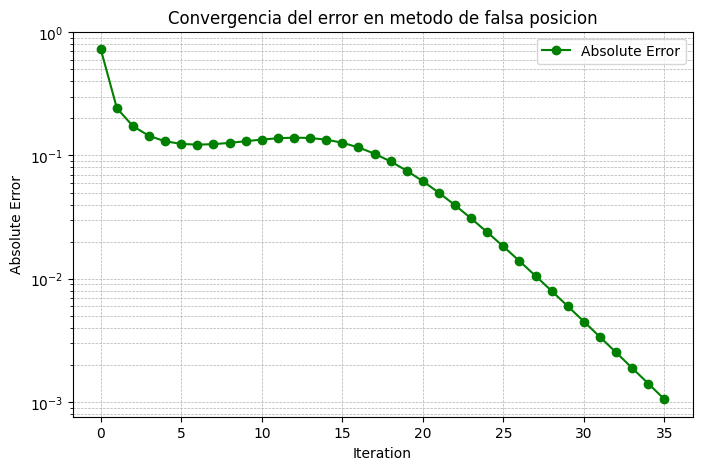

In [ ]:
data = falsa_posicion( -2 , 4, 0.001)
iterations = arr = list(range(data[1]))
errors = [fila[4] for fila in data[-1]]

#
plt.figure(figsize=(8, 5))
plt.semilogy(iterations, errors, marker="o", linestyle="-", color="green", label="Absolute Error")

# Personalización de la gráfica
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Convergencia del error en metodo de falsa posicion")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar gráfica
plt.show()

In [ ]:
pd.DataFrame(data[-1], columns=[ "iterations","xl", "xu", "xr", "error"]).style.pipe(make_pretty)

,iterations,xl,xu,xr,error
0,1,-1.272727,4,-1.272727,0.727273
1,2,-1.030824,4,-1.030824,0.241903
2,3,-0.857906,4,-0.857906,0.172919
3,4,-0.713769,4,-0.713769,0.144137
4,5,-0.583389,4,-0.583389,0.130379
5,6,-0.459211,4,-0.459211,0.124179
6,7,-0.336763,4,-0.336763,0.122448
7,8,-0.213169,4,-0.213169,0.123593
8,9,-0.086590,4,-0.086590,0.126580
9,10,0.043964,4,0.043964,0.130553


In [ ]:
def func(x):
    return 2 * np.sin(x) - (x**2) / 10

def interpol_cuadratica(f, x0, x1, x2, tol=1e-6, max_iter=100):

    data = []

    for i in range(max_iter):
        # Evaluar la función en los tres puntos
        f0, f1, f2 = f(x0), f(x1), f(x2)

        denom = (x0 - x1) * (x0 - x2) * (x1 - x2)
        A = ((x2 * (f1 - f0) + x1 * (f0 - f2) + x0 * (f2 - f1)) / denom)
        B = ((x2*x2 * (f0 - f1) + x1*x1 * (f2 - f0) + x0*x0 * (f1 - f2)) / denom)


        if abs(A) < tol:
            print("La curvatura es casi plana, no se puede determinar el extremo.")
            return None, i, data


        x3 = -B / (2*A)
        f3 = f(x3)

        data.append((i+1, x0, x1, x2, x3, f3))

        # Verificar convergencia
        if abs(x3 - x1) < tol or i == max_iter - 1:
            return x3, i+1, data

        # Actualizar los tres puntos para la siguiente iteración
        # Mantener el nuevo punto x3 y dos de los anteriores para mantener el encierro del extremo
        if x3 < x1:
            x2, x1 = x1, x3
        else:
            x0, x1 = x1, x3

    # Si llegamos aquí, alcanzamos el número máximo de iteraciones
    return x3, max_iter, data

In [ ]:
result, iterations, data = interpol_cuadratica(func, 1.0, 2.0, 3.0)
print(result)

1.4275517785326461


Solución encontrada: x = 1.427552, f(x) = 1.775726
Número de iteraciones: 5


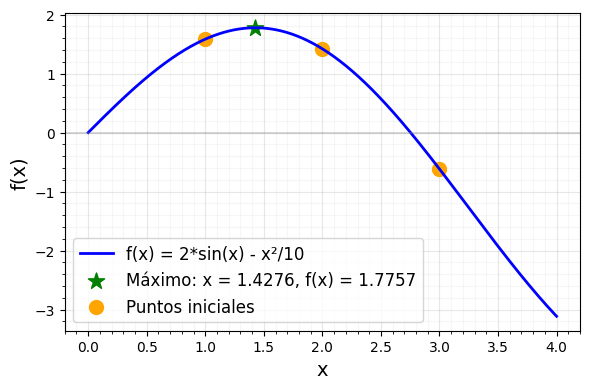

In [ ]:
def plot_results(f, datos, x_optimo, x_min=0, x_max=4):
    x = np.linspace(x_min, x_max, 1000)
    y = [f(xi) for xi in x]

    plt.figure(figsize=(6, 4))


    plt.plot(x, y, 'b-', linewidth=2, label='f(x) = 2*sin(x) - x²/10')


    x_points = [d[4] for d in datos]
    y_points = [d[5] for d in datos]


    plt.scatter([x_optimo], [f(x_optimo)], c='green', s=150, marker='*',
                label=f'Máximo: x = {x_optimo:.4f}, f(x) = {f(x_optimo):.4f}')


    puntos_iniciales_x = [datos[0][1], datos[0][2], datos[0][3]]
    puntos_iniciales_y = [f(x) for x in puntos_iniciales_x]
    plt.scatter(puntos_iniciales_x, puntos_iniciales_y, c='orange', s=100,
                label='Puntos iniciales')


    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Añadir una cuadrícula secundaria más fina
    plt.minorticks_on()
    plt.grid(which='minor', alpha=0.1)

    # Añadir una línea horizontal en y=0 para referencia
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Ejecutar el algoritmo
x_optimo, iteraciones, datos = interpol_cuadratica(func, 1.0, 2.0, 3.0)

# Mostrar resultados
print(f"Solución encontrada: x = {x_optimo:.6f}, f(x) = {func(x_optimo):.6f}")
print(f"Número de iteraciones: {iteraciones}")

# Graficar los resultados
plot_results(func, datos, x_optimo)

In [ ]:
data = interpol_cuadratica(func,0,1,4)
pd.DataFrame(data[-1], columns=["iterations", "x0","x1", "x2","x3", "fx3"])

,iterations,x0,x1,x2,x3,fx3
0,1,0.000000,1.000000,4.000000,1.505535,1.769079
1,2,1.000000,1.505535,4.000000,1.490253,1.771431
2,3,1.000000,1.490253,1.505535,1.425636,1.775722
3,4,1.000000,1.425636,1.490253,1.426602,1.775725
4,5,1.425636,1.426602,1.490253,1.427548,1.775726
5,6,1.426602,1.427548,1.490253,1.427551,1.775726
6,7,1.427548,1.427551,1.490253,1.427552,1.775726
7,8,1.427551,1.427552,1.490253,1.427552,1.775726


In [ ]:
def razon_dorada(xu, xl, tol=1e-6, max_iter=100):
    phi = (1 + math.sqrt(5)) / 2
    data = []

    for i in range(max_iter):
        d = (xu - xl) / phi
        x1, x2 = xl + d, xu - d
        f1, f2 = func(x1), func(x2)

        if f1 > f2:
            xl = x2
        else:
            xu = x1

        error = abs(xu - xl)
        data.append((i + 1, xl, xu, x1, x2, f1, f2, error))

        if error < tol:
            return (x1 + x2) / 2, i + 1, data

    return (x1 + x2) / 2, max_iter, data

In [ ]:
razon_dorada(4, 0,)

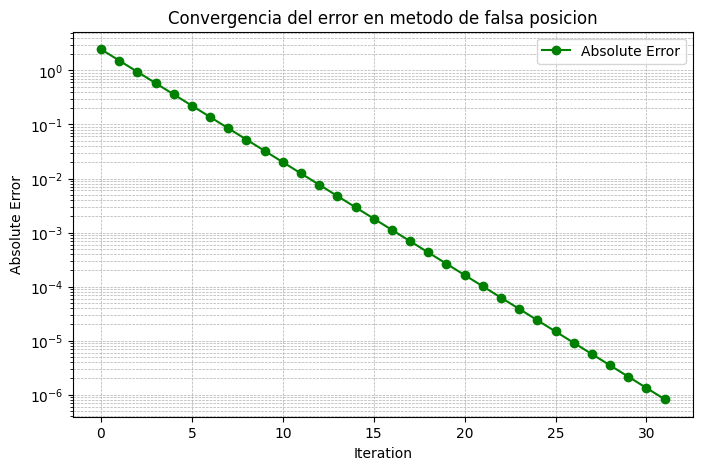

,iterations,xl,xu,x1,x2,f1,f2,error
0,1,2.472136,0.000000,1.527864,2.472136,1.764720,0.629974,2.472136e+00
1,2,2.472136,0.944272,0.944272,1.527864,1.530976,1.764720,1.527864e+00
2,3,1.888544,0.944272,1.527864,1.888544,1.764720,1.543223,9.442719e-01
3,4,1.888544,1.304952,1.304952,1.527864,1.759452,1.764720,5.835921e-01
4,5,1.665631,1.304952,1.527864,1.665631,1.764720,1.713580,3.606798e-01
5,6,1.527864,1.304952,1.442719,1.527864,1.775475,1.764720,2.229124e-01
6,7,1.527864,1.390097,1.390097,1.442719,1.774200,1.775475,1.377674e-01
7,8,1.475242,1.390097,1.442719,1.475242,1.775475,1.773242,8.514495e-02
8,9,1.442719,1.390097,1.422619,1.442719,1.775699,1.775475,5.262247e-02
9,10,1.442719,1.410197,1.410197,1.422619,1.775398,1.775699,3.252248e-02


In [ ]:
data = razon_dorada( 0 , 4)
iterations = arr = list(range(data[1]))
errors = [fila[7] for fila in data[-1]]

#
plt.figure(figsize=(8, 5))
plt.semilogy(iterations, errors, marker="o", linestyle="-", color="green", label="Absolute Error")

# Personalización de la gráfica
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Convergencia del error en metodo de falsa posicion")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar gráfica
plt.show()

pd.DataFrame(data[-1], columns=["iterations", "xl","xu", "x1","x2", "f1", "f2", "error"])

In [ ]:
def func(x):
    return x**3 - x - 2

In [ ]:
def newton(x0, tol=1e-6, max_iter=100):
    x = sp.symbols('x')
    f = func(x)
    df = sp.diff(f, x)

    x_val = x0
    result = []

    if func(x_val) == 0:
        return x_val, 0, [(0, x_val, x_val, 0)]

    for i in range(max_iter):
        f_val = f.subs(x, x_val).evalf()
        df_val = df.subs(x, x_val).evalf()

        if abs(df_val) < 1e-12:
            print("Derivada muy pequeña, posible punto crítico.")
            return None, i, result

        x_new = x_val - (f_val / df_val)
        error = abs(x_new - x_val)
        result.append((i + 1, x_val, x_new, error))

        if error < tol:
            return x_new, i + 1, result
        x_val = x_new

    print("El método de Newton no convergió después de", max_iter, "iteraciones.")
    return x_val, max_iter, result

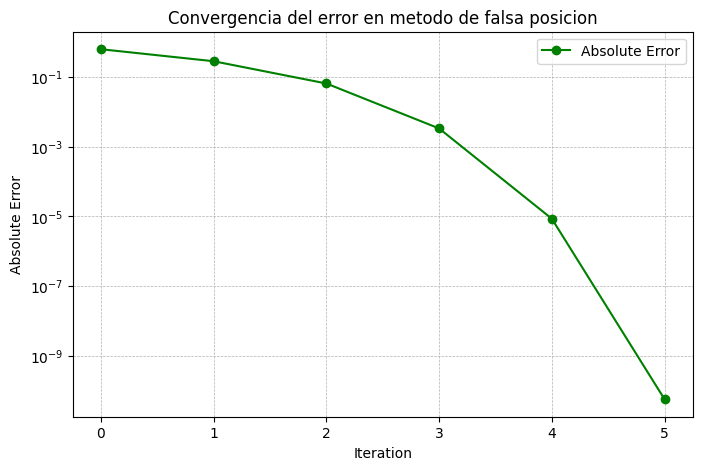

,iterations,X value,X new,error
0,1,2.5,1.87323943661972,0.626760563380282
1,2,1.87323943661972,1.58983602192005,0.283403414699667
2,3,1.58983602192005,1.52472639805285,0.0651096238672022
3,4,1.52472639805285,1.52138827588776,0.00333812216509100
4,5,1.52138827588776,1.52137970686095,8.56902680612670e-6
5,6,1.52137970686095,1.52137970680457,5.63844526624280e-11


In [ ]:
data = newton(2.5)
iterations = arr = list(range(data[1]))
errors = [fila[3] for fila in data[-1]]

#
plt.figure(figsize=(8, 5))
plt.semilogy(iterations, errors, marker="o", linestyle="-", color="green", label="Absolute Error")

# Personalización de la gráfica
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Convergencia del error en metodo de falsa posicion")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar gráfica
plt.show()

pd.DataFrame(data[-1], columns=["iterations", "X value","X new ","error"])

In [ ]:
def raphson(x0, tol=1e-6, max_iter=100):
    x = sp.symbols('x')
    f = func(x)
    df = sp.diff(f, x)
    ddf = sp.diff(df, x)

    x_val = x0
    result = []

    if func(x_val) == 0:
        return x_val, 0, [(0, x_val, x_val, 0)]

    for i in range(max_iter):
        f_val = f.subs(x, x_val).evalf()
        df_val = df.subs(x, x_val).evalf()
        ddf_val = ddf.subs(x, x_val).evalf()

        denominator = df_val**2 - f_val * ddf_val
        if abs(denominator) < 1e-12:
            print("Denominador muy pequeño, posible falla del método de Raphson.")
            return None, i, result

        x_new = x_val - (f_val * df_val) / denominator
        error = abs(x_new - x_val)
        result.append((i + 1, x_val, x_new, error))

        if error < tol:
            return x_new, i + 1, result
        x_val = x_new

    print("El método de Raphson no convergió después de", max_iter, "iteraciones.")
    return x_val, max_iter, result

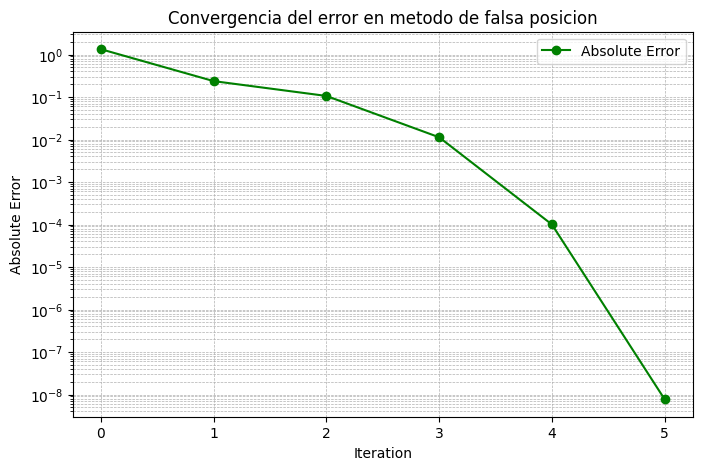

,iterations,X value,X new,error
0,1,2.5,1.16743989877689,1.33256010122311
1,2,1.16743989877689,1.40399957005117,0.236559671274285
2,3,1.40399957005117,1.50998533800301,0.105985767951837
3,4,1.50998533800301,1.52127926218260,0.0112939241795940
4,5,1.52127926218260,1.52137969905678,0.000100436874177712
5,6,1.52137969905678,1.52137970680457,7.74778663448217e-9


In [ ]:
data = raphson(2.5)
iterations = arr = list(range(data[1]))
errors = [fila[3] for fila in data[-1]]

#
plt.figure(figsize=(8, 5))
plt.semilogy(iterations, errors, marker="o", linestyle="-", color="green", label="Absolute Error")

# Personalización de la gráfica
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Convergencia del error en metodo de falsa posicion")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar gráfica
plt.show()

pd.DataFrame(data[-1], columns=["iterations", "X value","X new ","error"])

In [ ]:
def busqueda_aleatoria(func, bounds, num_samples=1000):
    dim = len(bounds)       #dimension
    best_x = None
    best_f = float('inf')
    data = []

    for i in range(num_samples):
        x_candidate = np.array([np.random.uniform(low, high) for low, high in bounds])
        f_candidate = func(*x_candidate)

        if f_candidate < best_f:
            best_f = f_candidate
            best_x = x_candidate

        data.append((i + 1, x_candidate, f_candidate))

    return best_x, num_samples, data

In [ ]:
bounds = [(-5, 5), (-5, 5)]  # Rango de búsqueda en cada dimensión

data = busqueda_aleatoria(lambda x, y: (x - 3)**2 + (y + 2)**2, bounds, num_samples=1000)
iterations = arr = list(range(data[1]))
candidates = [fila[1] for fila in data[-1]]


pd.DataFrame(data[-1], columns=["iterations", "X value","f value"])

,iterations,X value,f value
0,1,"[-3.9729669845865945, -1.724606502542636]",48.698110
1,2,"[4.841028153331379, 1.1599398352396424]",13.374604
2,3,"[2.7231722587794627, 1.2090453982153342]",10.374606
3,4,"[-1.2596913562469658, -4.6103416823863785]",24.958854
4,5,"[-2.545505180307109, 2.494196025782699]",50.950426
...,...,...,...
995,996,"[-0.5874232844759124, 2.001345536744024]",28.880372
996,997,"[-0.9041512945101262, -2.634775918249849]",15.645338
997,998,"[-3.666369746352448, -2.6336510336329333]",44.841999
998,999,"[-4.888552576513495, -0.019312367360226013]",66.152385


In [ ]:
# Parámetros
xl, xu = 0.5, 3.5  # Intervalo inicial
x0 = 2.5  # Punto inicial para Newton y Raphson
tol = 1e-6
max_iter = 100

# Ejecutar los métodos
print(bisection(xl, xu, tol))
print(falsa_posicion(xl, xu, tol))
print(newton(x0, tol, max_iter))
print(raphson(x0, tol, max_iter))
print(razon_dorada(xl, xu, tol))


In [ ]:
xl, xm, xu = 0, 1, 3  # Puntos iniciales
tol = 1e-6
max_iter = 100

# Ejecutar interpolación cuadrática
print(interpol_cuadratica(xl, xm, xu, tol, max_iter))

In [ ]:
bounds = [(-5, 5), (-5, 5)]  # Rango de búsqueda en cada dimensión
print(busqueda_aleatoria(lambda x, y: (x - 3)**2 + (y + 2)**2, bounds, num_samples=1000))

(array([ 3.07939509, -2.2224582 ]), 1000, [(1, array([ 0.61907999, -0.764414  ]), np.float64(7.195452862025757)), (2, array([3.4325167 , 2.05141065]), np.float64(16.6009989711337)), (3, array([2.20557844, 0.96872495]), np.float64(9.444433451374458)), (4, array([ 3.69842135, -1.92338485]), np.float64(0.49366227075407515)), (5, array([-1.87321529,  3.92494797]), np.float64(58.853235702902325)), (6, array([-2.53544273, -4.01481621]), np.float64(34.700610514181314)), (7, array([ 2.38098964, -0.77877483]), np.float64(1.8745647415017872)), (8, array([3.61856925, 3.79558667]), np.float64(33.97145271770848)), (9, array([-3.7381375, -3.9232421]), np.float64(49.101357172740876)), (10, array([ 2.77369199, -0.75766628]), np.float64(1.594608391167751)), (11, array([0.19357369, 1.63967526]), np.float64(21.12326465275196)), (12, array([ 2.72667214, -2.08355961]), np.float64(0.08169032764920414)), (13, array([-4.48167262,  2.60950298]), np.float64(77.22294286099236)), (14, array([-3.968752  , -0.12878